In [1]:
import numpy as np
import pandas as pd
import pylab

In [9]:
file_path = '/home/genty/Hiwi-TimeSeries/Hiwi-TimeSeries/dataset/Versuch1_final.csv'
df = pd.read_csv(file_path, delimiter=';', decimal=',')
df = df.head(100000)

In [17]:
def thresholding_algo(y, lag, influence):
    signals = np.zeros(len(y))
    filteredY = [0]*len(y)
    avgFilter = [0]*len(y)
    stdFilter = [0]*len(y)
    avgFilter[- 1] = np.mean(y[0:lag])
    stdFilter[- 1] = np.std(y[0:lag])
    for i in range(len(y)):
        threshold = np.mean(y[i:i+lag])
        if abs(y[i] - avgFilter[i-1]) > threshold * stdFilter [i-1]:
            if y[i] > avgFilter[i-1]:
                signals[i] = 1
            else:
                signals[i] = -1

            filteredY[i] = influence * y[i] + (1 - influence) * filteredY[i-1]
            avgFilter[i] = np.mean(filteredY[(i-lag+1):i+1])
            stdFilter[i] = np.std(filteredY[(i-lag+1):i+1])
        else:
            signals[i] = 0
            filteredY[i] = y[i]
            avgFilter[i] = np.mean(filteredY[(i-lag+1):i+1])
            stdFilter[i] = np.std(filteredY[(i-lag+1):i+1])

    return dict(signals = np.asarray(signals),
                avgFilter = np.asarray(avgFilter),
                stdFilter = np.asarray(stdFilter))

In [11]:
def rename_columns(dataframe):
    renamed_columns = []
    for column in dataframe.columns:
        parts = column.split('_')
        if len(parts) >= 3:
            if parts[0] == 'Geschw':
                new_column = 'Speed_' + parts[1]
            elif parts[0] == 'Beschl':
                new_column = 'Accel_' + parts[1]
            elif parts[0] == 'Kraft':
                new_column = 'Power_' + parts[1]
            elif parts[0] == 'Current':
                new_column = 'Current_' + parts[1]
        else:
            new_column = column
        renamed_columns.append(new_column)
    
    dataframe.columns = renamed_columns
    return dataframe

In [12]:
df.drop('removed_material_0', axis=1, inplace=True)
df = rename_columns(df)

## Tables

In [18]:
def get_peak_indices_by_column(dataframe, lag, influence):
    peak_indices_by_column = {}

    for column_name in dataframe.columns:
        result = thresholding_algo(dataframe[column_name], lag, influence)
        peak_indices = [i for i, signal in enumerate(result['signals']) if signal != 0]
        peak_indices_by_column[column_name] = peak_indices

    return peak_indices_by_column

In [19]:
peak_info = get_peak_indices_by_column(df, 10000, 0.1)

/home/genty/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/genty/.local/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/genty/.local/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/genty/.local/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/genty/.local/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [20]:
peaks_df = pd.DataFrame({'Column_Name': list(peak_info.keys()), 
                             'Peak_Indices': list(peak_info.values())})

peaks_df['Num_Peaks'] = peaks_df['Peak_Indices'].apply(len)
peaks_df = peaks_df[~peaks_df['Column_Name'].str.startswith('Power')]
print(peaks_df)

   Column_Name                                       Peak_Indices  Num_Peaks
0      Speed_X  [10000, 10001, 10002, 10003, 10004, 10005, 100...      41209
1      Speed_Y  [12379, 12380, 12381, 12382, 12383, 12384, 123...      25626
2      Speed_Z  [0, 10000, 10001, 10002, 10003, 10004, 10005, ...      70323
3     Speed_SP                                                 []          0
4      Accel_X  [0, 10000, 10001, 10002, 10003, 10004, 10005, ...      89648
5      Accel_Y  [0, 10019, 10022, 10024, 10027, 10031, 10032, ...      88360
6      Accel_Z  [0, 10000, 10001, 10002, 10003, 10004, 10005, ...      89922
7     Accel_SP  [10000, 10001, 10002, 10003, 10004, 10005, 100...      22999
12   Current_X  [0, 10007, 10012, 10013, 10023, 10024, 10027, ...      57269
13   Current_Y  [10000, 10001, 10002, 10003, 10004, 10005, 100...      50456
14   Current_Z  [13375, 13376, 13377, 13378, 13379, 13380, 133...       1310
15  Current_SP  [0, 10895, 10896, 10897, 10898, 10899, 10900, ...      35888

   Column_Name                                       Peak_Indices  Num_Peaks
0      Speed_X  [13417, 13418, 13419, 13420, 13421, 13422, 134...       2399
1      Speed_Y  [13416, 13417, 13418, 13419, 13420, 13421, 134...       2655
2      Speed_Z  [10000, 10001, 10002, 10003, 10004, 10005, 100...    1785901
3     Speed_SP                                                 []          0
4      Accel_X  [10000, 10001, 10002, 10003, 10004, 10005, 100...    1785901
5      Accel_Y  [10000, 10001, 10002, 10003, 10004, 10005, 100...    1785901
6      Accel_Z  [10000, 10001, 10002, 10003, 10004, 10005, 100...    1785901
7     Accel_SP  [10791, 10806, 10836, 10846, 10856, 10861, 108...     195759
12   Current_X  [10044, 10060, 10685, 10800, 10832, 10864, 108...    1025459
13   Current_Y  [10000, 10001, 10002, 10003, 10004, 10005, 100...     944992
14   Current_Z  [13375, 13376, 13377, 13378, 13379, 13380, 133...      27636
15  Current_SP  [10895, 10896, 10897, 10898, 10899, 10900, 109...     589102

In [13]:
peak_info = get_peak_indices_by_column(df, lag, influence)

In [14]:
peaks_df = pd.DataFrame({'Column_Name': list(peak_info.keys()), 
                             'Peak_Indices': list(peak_info.values())})

peaks_df['Num_Peaks'] = peaks_df['Peak_Indices'].apply(len)
peaks_df = peaks_df[~peaks_df['Column_Name'].str.startswith('Power')]
print(peaks_df)

   Column_Name                                       Peak_Indices  Num_Peaks
0      Speed_X  [34638, 34639, 34640, 34641, 34642, 34643, 346...       2279
1      Speed_Y  [34637, 34638, 34639, 34640, 34641, 34642, 346...       2624
2      Speed_Z  [30000, 30001, 30002, 30003, 30004, 30005, 300...    1765901
3     Speed_SP                                                 []          0
4      Accel_X  [30000, 30001, 30002, 30003, 30004, 30005, 300...    1765901
5      Accel_Y  [30000, 30001, 30002, 30003, 30004, 30005, 300...    1765901
6      Accel_Z  [30000, 30001, 30002, 30003, 30004, 30005, 300...    1765900
7     Accel_SP  [32032, 32033, 32034, 32035, 32036, 32037, 320...      48033
12   Current_X  [30006, 30007, 30008, 30011, 30012, 30026, 300...    1204971
13   Current_Y  [30000, 30001, 30002, 30003, 30004, 30005, 300...     943521
14   Current_Z  [34248, 34249, 34250, 34251, 34252, 34253, 342...      24746
15  Current_SP  [30364, 30365, 30366, 30367, 30370, 30371, 303...     285710

In [28]:
import itertools

def find_common_peaks(peaks_df):
    common_peaks = []
    
    # Create combinations of column pairs
    column_combinations = list(itertools.combinations(peaks_df['Column_Name'], 2))
    
    for pair in column_combinations:
        column1_peaks = set(peaks_df.loc[peaks_df['Column_Name'] == pair[0], 'Peak_Indices'].iloc[0])
        column2_peaks = set(peaks_df.loc[peaks_df['Column_Name'] == pair[1], 'Peak_Indices'].iloc[0])
        
        common_indices = list(column1_peaks.intersection(column2_peaks))
        num_common_peaks = len(common_indices)
        
        common_peaks.append({'feature_pair': pair, 'peak_indices': common_indices, 'num_peaks': num_common_peaks})
    
    return pd.DataFrame(common_peaks)

# Example usage:
# common_peaks_df = find_common_peaks(peaks_df)
# print(common_peaks_df)


In [29]:
common_peaks_df = find_common_peaks(peaks_df)
print(common_peaks_df)

               feature_pair  \
0        (Speed_X, Speed_Y)   
1        (Speed_X, Speed_Z)   
2       (Speed_X, Speed_SP)   
3        (Speed_X, Accel_X)   
4        (Speed_X, Accel_Y)   
..                      ...   
61   (Current_X, Current_Z)   
62  (Current_X, Current_SP)   
63   (Current_Y, Current_Z)   
64  (Current_Y, Current_SP)   
65  (Current_Z, Current_SP)   

                                         peak_indices  num_peaks  
0   [3131, 3132, 3133, 3134, 3135, 3136, 3137, 313...    1780748  
1   [655389, 655390, 655449, 655450, 655451, 65545...      28677  
2   [3147, 3148, 3149, 3150, 3151, 3152, 3153, 315...    1792607  
3   [1048577, 1048578, 1048579, 1048580, 1048581, ...      25181  
4   [1048592, 1048593, 1048594, 1048595, 1048596, ...      24877  
..                                                ...        ...  
61  [13390, 13391, 13392, 13393, 13394, 13395, 133...    1736531  
62  [13390, 13391, 13392, 13393, 13394, 13395, 133...    1750203  
63  [13386, 13387, 13388

In [30]:
import os
output_folder = 'D:\Hiwi-TimeSeries\output'

filename = os.path.join(output_folder, f'common_peaks_t_{threshold}_l_{lag}_i_{influence}.xlsx')
common_peaks_df.to_excel(filename, sheet_name='common_peaks', index=False)


## Plots

In [26]:
def plot_results(result, y, threshold):
    # Plot result
    pylab.figure(figsize=(12, 4))

    pylab.subplot(211)
    pylab.plot(np.arange(1, len(y)+1), y)

    pylab.plot(np.arange(1, len(y)+1),
            result["avgFilter"], color="black", lw=2)

    pylab.plot(np.arange(1, len(y)+1),
            result["avgFilter"] + threshold * result["stdFilter"], color="red", lw=2)

    pylab.plot(np.arange(1, len(y)+1),
            result["avgFilter"] - threshold * result["stdFilter"], color="red", lw=2)

    pylab.subplot(212)
    pylab.step(np.arange(1, len(y)+1), result["signals"], color="green", lw=2)
    pylab.ylim(-1.5, 1.5)
    pylab.show()

### X-axis

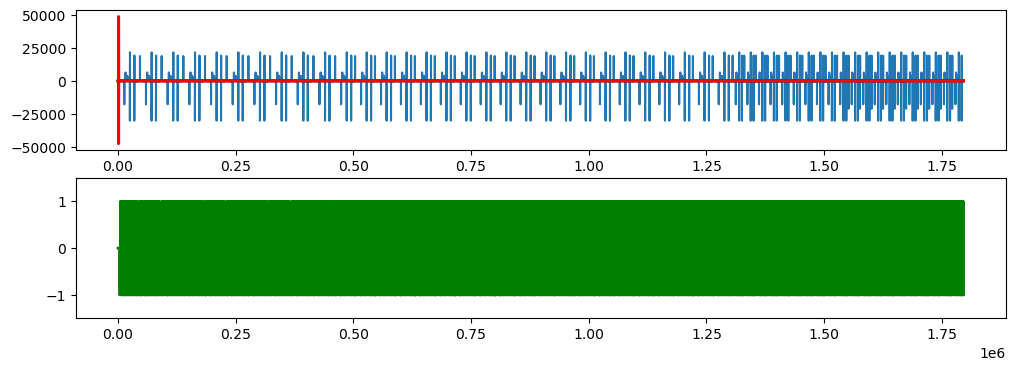

In [28]:
# Run algo with settings from above
y = df.iloc[:, 0]
result = thresholding_algo(y, lag=lag, threshold=threshold, influence=influence)
plot_results(result, y, threshold)

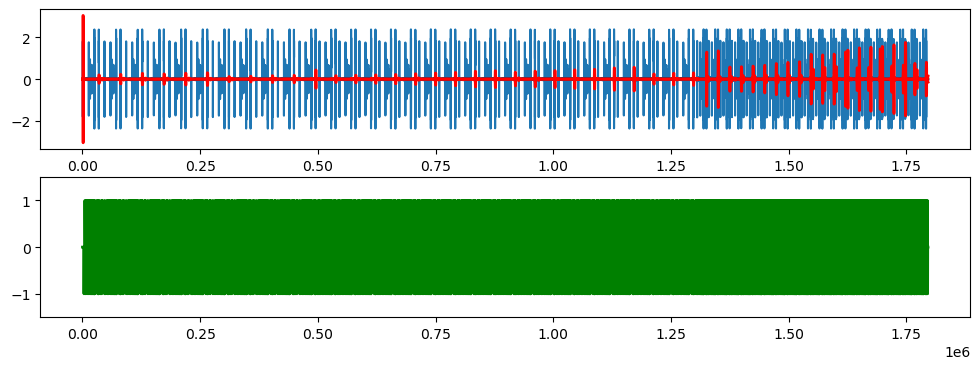

In [29]:
y = df.iloc[:, 4]
result = thresholding_algo(y, lag=lag, threshold=threshold, influence=influence)
plot_results(result, y, threshold)

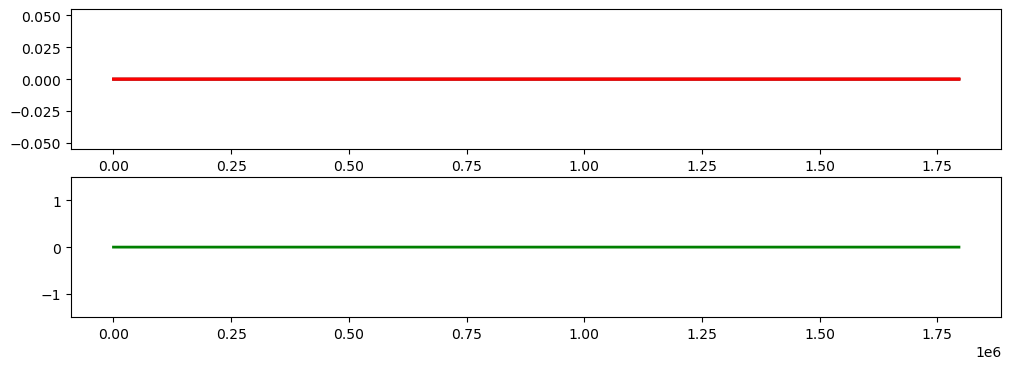

In [30]:
y = df.iloc[:, 8]
result = thresholding_algo(y, lag=lag, threshold=threshold, influence=influence)
plot_results(result, y, threshold)

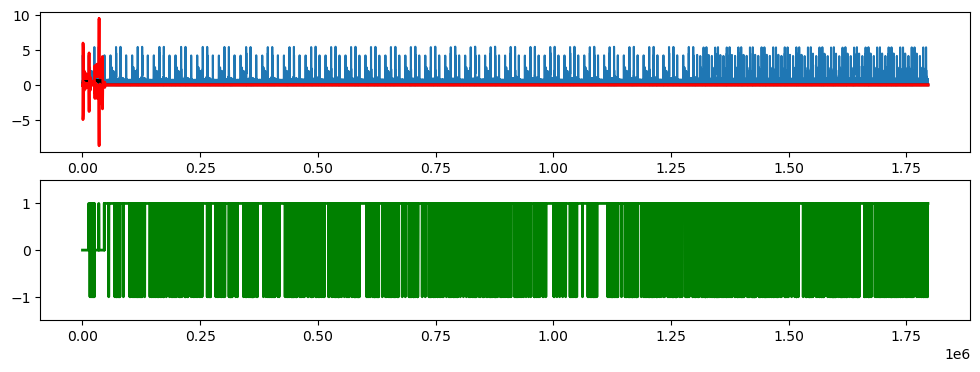

In [31]:
y = df.iloc[:, 13]
result = thresholding_algo(y, lag=lag, threshold=threshold, influence=influence)
plot_results(result, y, threshold)

### Y-axis

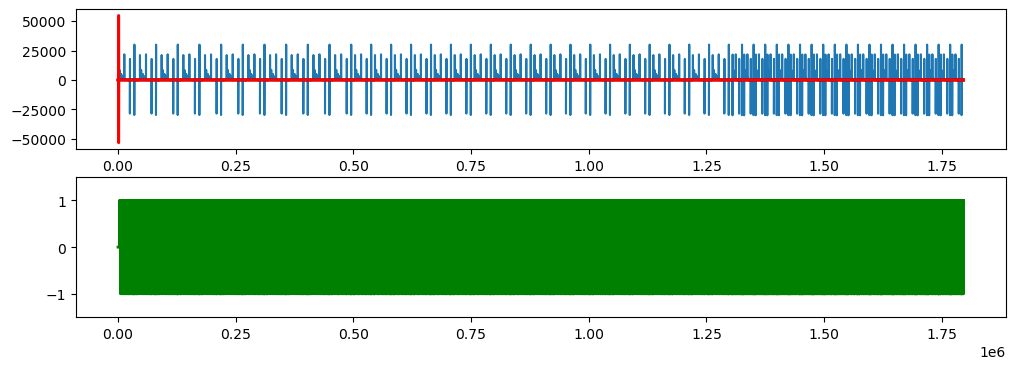

In [32]:
# Run algo with settings from above
y = df.iloc[:, 1]
result = thresholding_algo(y, lag=lag, threshold=threshold, influence=influence)
plot_results(result, y, threshold)

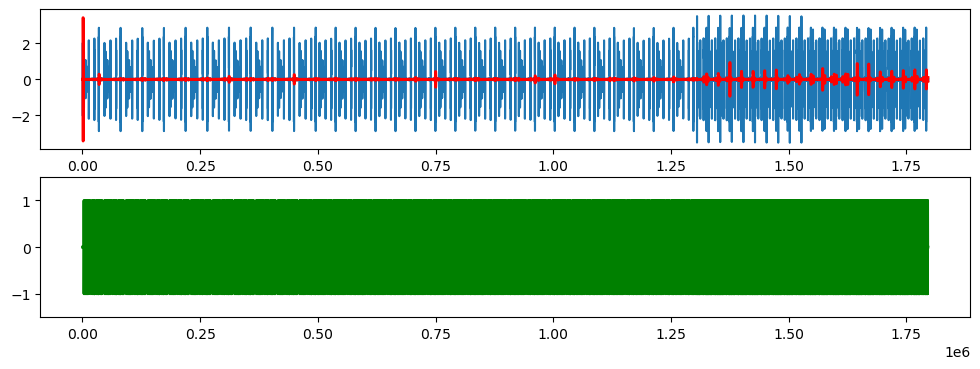

In [33]:
# Run algo with settings from above
y = df.iloc[:, 5]
result = thresholding_algo(y, lag=lag, threshold=threshold, influence=influence)
plot_results(result, y, threshold)

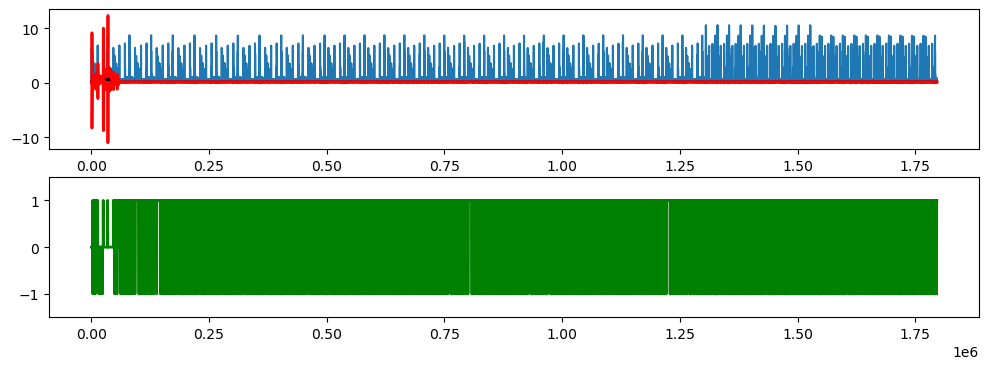

In [34]:
# Run algo with settings from above
y = df.iloc[:, 14]
result = thresholding_algo(y, lag=lag, threshold=threshold, influence=influence)
plot_results(result, y, threshold)

### Z-axis

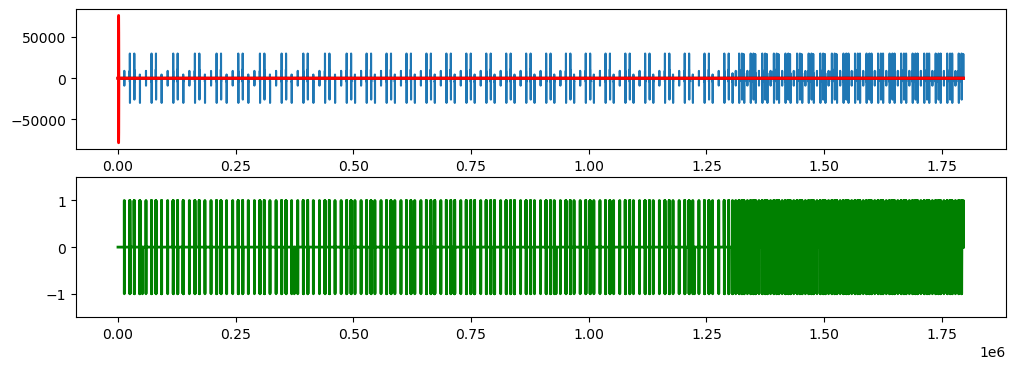

In [35]:
# Run algo with settings from above
y = df.iloc[:, 2]
result = thresholding_algo(y, lag=lag, threshold=threshold, influence=influence)
plot_results(result, y, threshold)

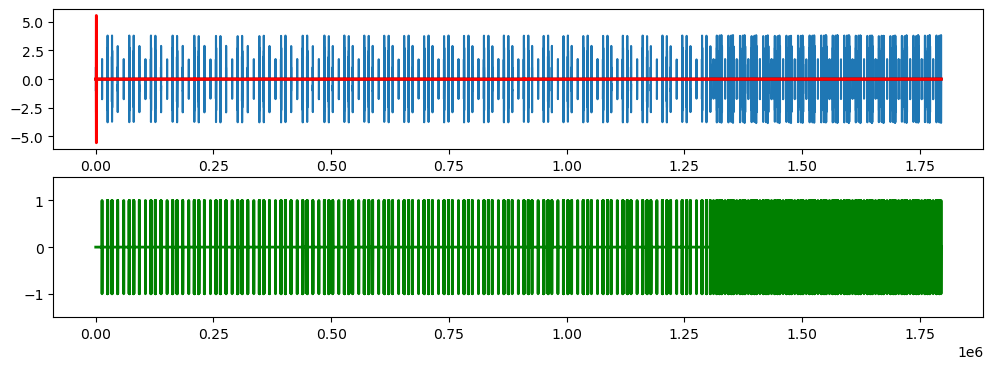

In [36]:
# Run algo with settings from above
y = df.iloc[:, 6]
result = thresholding_algo(y, lag=lag, threshold=threshold, influence=influence)
plot_results(result, y, threshold)

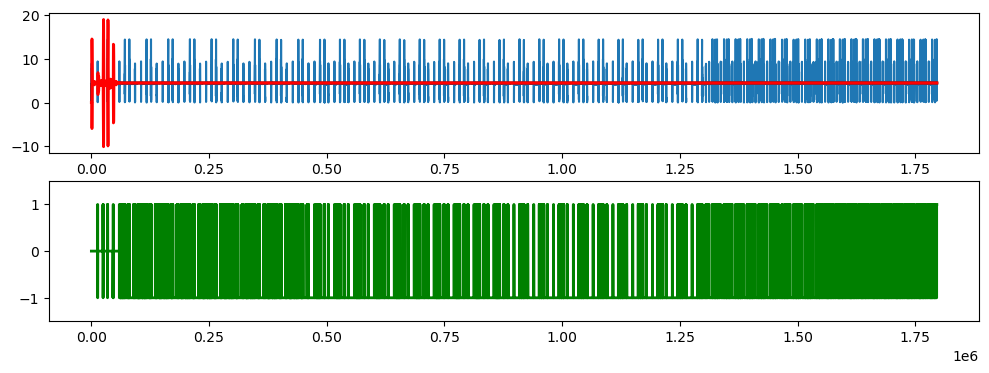

In [37]:
# Run algo with settings from above
y = df.iloc[:, 15]
result = thresholding_algo(y, lag=lag, threshold=threshold, influence=influence)
plot_results(result, y, threshold)

### SP-axis

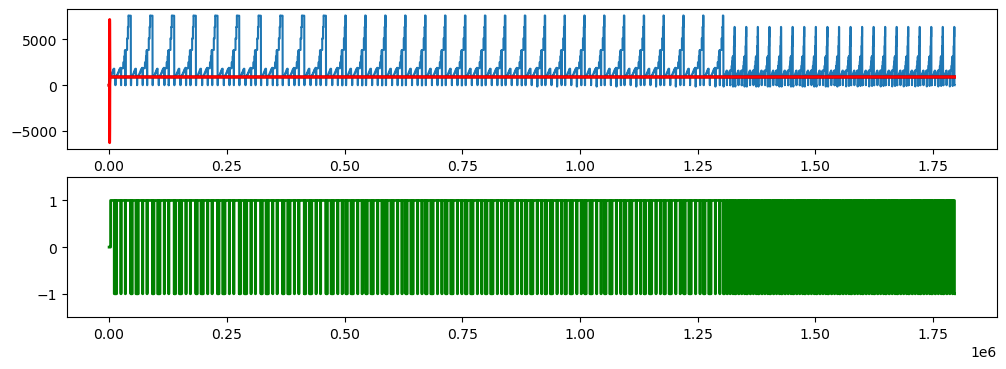

In [38]:
# Run algo with settings from above
y = df.iloc[:, 3]
result = thresholding_algo(y, lag=lag, threshold=threshold, influence=influence)
plot_results(result, y, threshold)

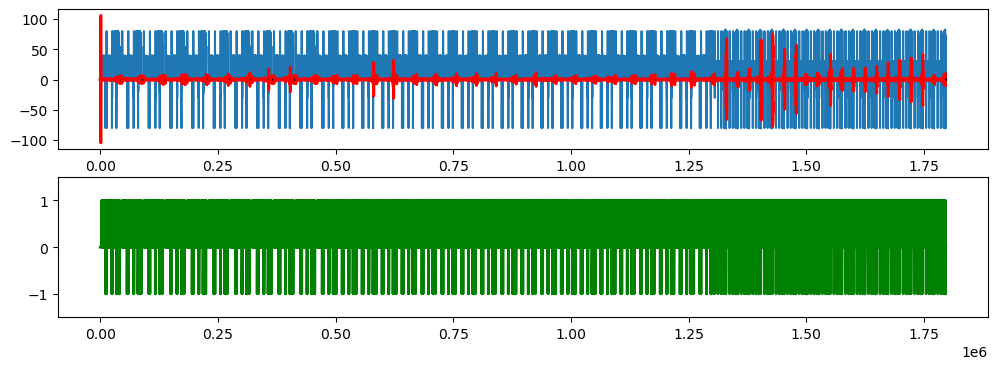

In [39]:
# Run algo with settings from above
y = df.iloc[:, 7]
result = thresholding_algo(y, lag=lag, threshold=threshold, influence=influence)
plot_results(result, y, threshold)

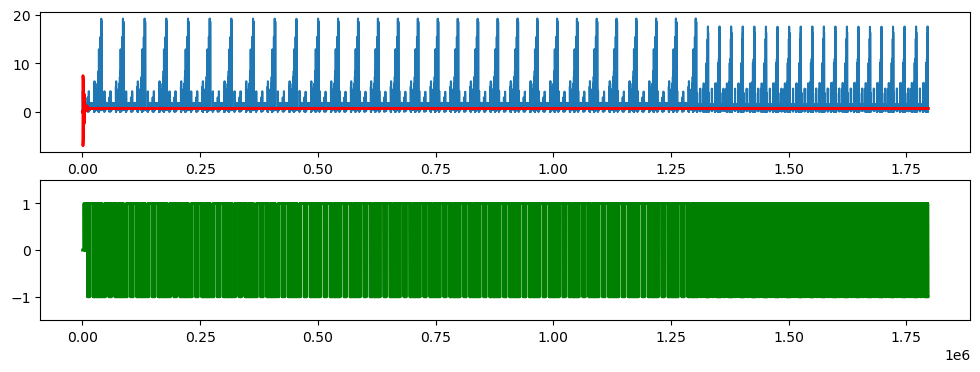

In [40]:
# Run algo with settings from above
y = df.iloc[:, 16]
result = thresholding_algo(y, lag=lag, threshold=threshold, influence=influence)
plot_results(result, y, threshold)

In [ ]:
Geshw - Speed_X
Beschl - Accel_X
Current - Current_X